# Objective:

**To implement Gradient Descent for Linear Regression and compare its performance with the LinearRegression offered by Sklearn.** 

I'll use the Boston housing dataset for this exercise. It contains 506 rows and 14 columns. The task is to predict the VALUE target variable which is the median value of the house in multiples of $1000. Let's begin by importing the libraries we need.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sbn
from sklearn.metrics import mean_squared_error

Convert the data into a dataframe so that it's easier to interpret.

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['VALUE'] = boston.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


To implement Gradient Descent sepecifically for the optimization function of Linear regression, I'll use the formulae shown in the following image.

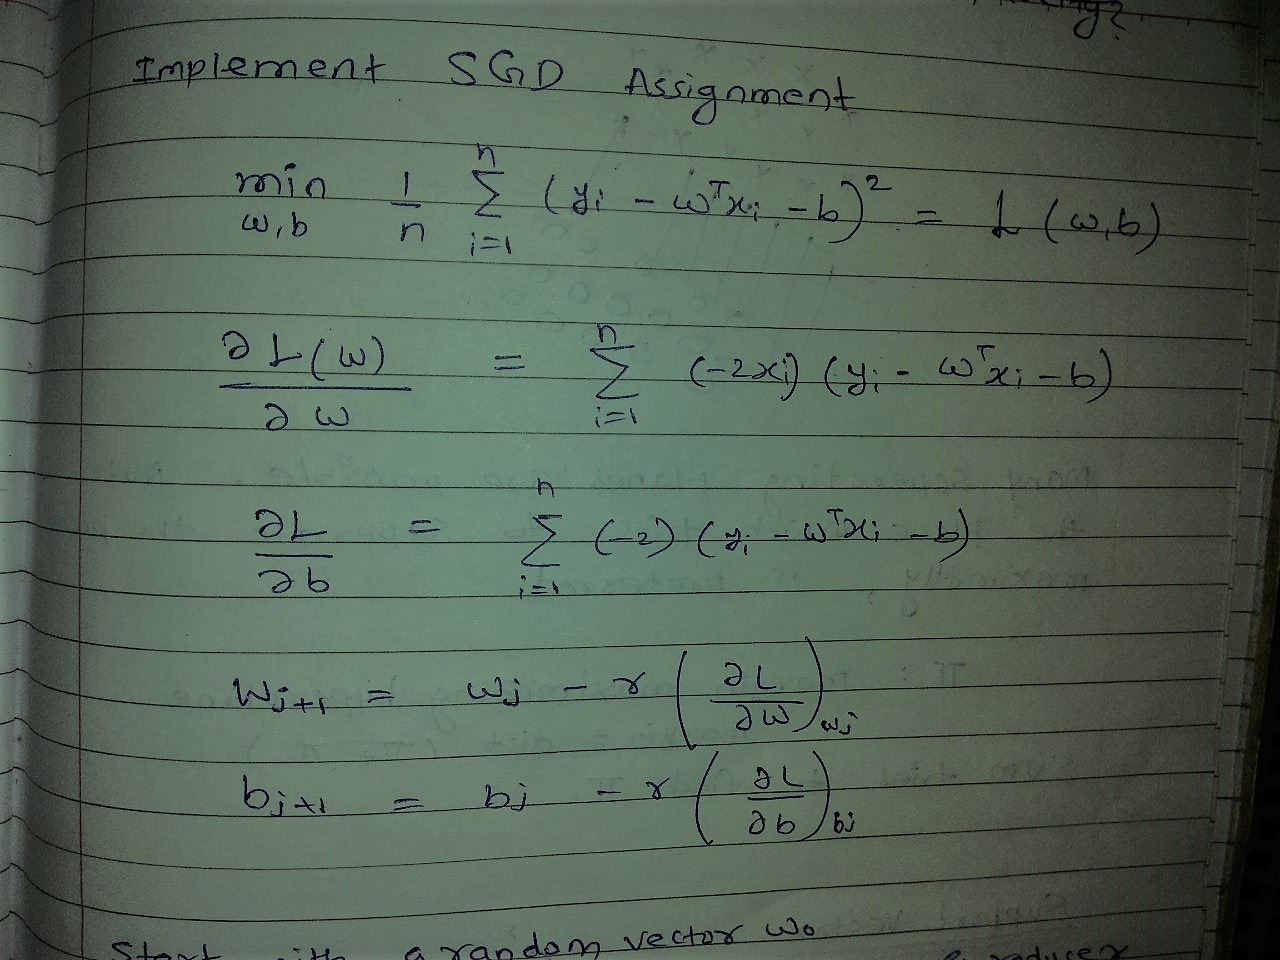

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\ucanr\Dropbox\AAIC\assignments mandatory\6. SGD\pic.jpg', width=600, height=500, unconfined=True)

**Function: derivative()**

As the name suggests, it will return the derivatives with respect to W and B shown in the image above. 

In [4]:
def derivative(X, y, w, b, wrt):
    
    # with respect to W
    if wrt == 'w':
        
        loss_sum = np.zeros(X[0].shape).reshape(-1,1)
        
        # For all the points in dataset X
        for i in range(X.shape[0]): 
            loss = (-2 * X[i].reshape(-1,1)) * (y[i] - np.matmul(w.T,X[i].reshape(-1,1)) - b)
            loss_sum += loss
    
    # with respect to b
    elif wrt == 'b':
        
        loss_sum = 0
        
        for i in range(X.shape[0]):
                        
            loss = (-2) * (y[i] - np.matmul(w.T, X[i]) - b)
            loss_sum += loss

    grad =  loss_sum / X.shape[0]
    
    return grad

**Function: has_converged()**

This function will determine when to stop the iterations of GD. When the distance between old coef vector and new coef vector is less than a threshold, it will prompt the calling function to terminate.

In [5]:
def has_converged(w_old, w_new, iteration, threshold):
    
    dist = np.linalg.norm(w_new - w_old)
    
    # If the distance is more than a threshold, continue running
    if dist > threshold:
        
        print('iteration: {} | distance Not converged: {}'.format(iteration, dist))
        
        return False
    # If the distance is less than the threshold, vector w has converged.
    else:
        
        print('iteration: {} | distance converged: {}'.format(iteration, dist))
            
        return True

**Function: GradientDescent()**

This takes a parameter called stochastic. If it is True, a fraction of the original training dataset will be used for gradient descent, otherwise, all the data points will be used.

In [6]:
                        # r is learning rate
def GradientDescent(X, y, r=0.2, stochastic=(False,-1)):

    # random initial weight vector of size features x 1. One coeff with each dimension.
    w_old = np.random.rand(X.shape[1], 1)    
    w_new = np.zeros((X.shape[1], 1))     # Initialize w_new with zeros 
    b_old = float(np.random.rand()) # initialize random b
    
    if stochastic[0] is True and stochastic[1] > 0:
        
        # convert "fraction of dataset to use" passed into number of rows to sample
        k = int(stochastic[1]*X.shape[0])
        # select random indexes to sample
        idx = np.random.randint(X.shape[0], size=k)
        X = X[idx,:]
            
    # Run until convergence
    iteration = 0
    while True:    
        w_new = w_old - (r * derivative(X, y, w_old, b_old, wrt='w'))
        b_new = b_old - (r * derivative(X, y, w_old, b_old, wrt='b'))
        
        if has_converged(w_old, w_new, iteration, threshold = 1):
            
            break
        
        w_old = w_new
        b_old = b_new
        
        iteration+=1
        
    return (w_new, b_new)

**Train and Test Splits**

Split the data into train and test sets

In [7]:
y=boston.target
X=boston.data

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2)

Standardize the data before passing it to Gradient Descent

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Using Gradient Descent

Let's apply the gradient descent function I defined above and find the coeficient vector W.
And also use the same to predict the target variable VALUE in test set.

In [9]:
w_new, b_new = GradientDescent(X_train_std, y_train, r=0.162, stochastic=(False, -1))

print('\nw_new is: {}'.format(w_new))
print('\nb_new is: {}'.format(b_new))

# Predicting the price of X[0] with formula: price = W.T * X + b
y_pred_manual = np.zeros(X_test_std.shape[0])

for i in range(X_test_std.shape[0]):
    
    y_pred_manual[i] = np.matmul(w_new.T, X_test_std[i]) + b_new

iteration: 0 | distance Not converged: 6.044560388649019
iteration: 1 | distance Not converged: 5.69629255568085
iteration: 2 | distance Not converged: 5.484116971425909
iteration: 3 | distance Not converged: 5.319795461628363
iteration: 4 | distance Not converged: 5.17427671154147
iteration: 5 | distance Not converged: 5.037807268964161
iteration: 6 | distance Not converged: 4.906928205598579
iteration: 7 | distance Not converged: 4.780300513972595
iteration: 8 | distance Not converged: 4.657337533631298
iteration: 9 | distance Not converged: 4.53773852062955
iteration: 10 | distance Not converged: 4.421320488295725
iteration: 11 | distance Not converged: 4.307953366406408
iteration: 12 | distance Not converged: 4.197533090431504
iteration: 13 | distance Not converged: 4.08996958746187
iteration: 14 | distance Not converged: 3.9851810437808273
iteration: 15 | distance Not converged: 3.8830910073802163
iteration: 16 | distance Not converged: 3.7836268481944924
iteration: 17 | distance 

Let's judge the model's performance using the standard metric used for regression problems: Mean Squared Error

In [10]:
mse_gd_manual=mean_squared_error(y_test, y_pred_manual)

In [11]:
mse_gd_manual

22.440236619413

## Using Stochastic Gradient Descent

To use stochastic GD, let's change the parameter 'stochastic' of the function GradientDescent() to (True, 0.9)

this will enable the SGD condition in the function and 80% of the passed X data will be used for gradient descent.

In [220]:
# w_new, b_new = GradientDescent(X_train_std, y_train,  r=0.165, stochastic=(True, 0.9))
w_new, b_new = GradientDescent(X_train_std, y_train,  r=0.155, stochastic=(True, 0.7))
#w_new, b_new = GradientDescent(X_train_std, y_train,  r=0.01, stochastic=(True, 0.4))


print('\nw_new is: {}'.format(w_new))
print('\nb_new is: {}'.format(b_new))

# Predicting the price of X[0] with formula: price = W.T * X + b
y_pred_manual = np.zeros(X_test_std.shape[0])

for i in range(X_test_std.shape[0]):
    
    # print('\nPrediction: {}'.format(np.matmul(w_new.T, X_test[i])+b_new))
    
    y_pred_manual[i] = np.matmul(w_new.T, X_test_std[i]) + b_new

iteration: 0 | distance Not converged: 2.294473953898579
iteration: 1 | distance Not converged: 1.8161211652782607
iteration: 2 | distance Not converged: 1.7614794817034305
iteration: 3 | distance Not converged: 1.4953555856486234
iteration: 4 | distance Not converged: 1.4188376729091576
iteration: 5 | distance Not converged: 1.2395269223293808
iteration: 6 | distance Not converged: 1.1539195877889723
iteration: 7 | distance Not converged: 1.023451011517045
iteration: 8 | distance converged: 0.9420186429169187

w_new is: [[ 0.09999595]
 [ 0.53872948]
 [-0.18320324]
 [-0.06192944]
 [ 0.42171259]
 [ 0.17765481]
 [-0.02936406]
 [ 0.58719065]
 [-0.73705757]
 [-0.0857843 ]
 [ 0.10475316]
 [ 0.4925764 ]
 [-0.49933489]]

b_new is: [21.75360545]


In [221]:
mse_sgd_manual = mean_squared_error(y_test, y_pred_manual)

In [222]:
mse_sgd_manual

41.10397403647714

## Using Scikit-learn

Scikit-learn offers a class called LinearRegression. Let's predict the target variable using it. scikit interally takes care of applying GD and finding the optimal W.

In [223]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [224]:
y_pred_lr = lin_reg.predict(X_test_std)

In [225]:
mse_sklearn=mean_squared_error(y_test, y_pred_lr)

**Summary in a nutshell**

In [226]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Algorithm" , "Mean Squared Error"]
table.add_row(['My custom Gradient Descent', mse_gd_manual])
table.add_row(['My custom Stochastic Gradient Descent', mse_sgd_manual])
table.add_row(["Sklearn's implementation", mse_sklearn])

### Conclusion:

* Learned how Gradient Descent works and implemented it for Linear Regression. 
* Compared performance of custom implemented gradient descent with the linear regression function offered by sklearn. 


In [227]:
print(table)

+---------------------------------------+--------------------+
|               Algorithm               | Mean Squared Error |
+---------------------------------------+--------------------+
|       My custom Gradient Descent      |  22.440236619413   |
| My custom Stochastic Gradient Descent | 41.10397403647714  |
|        Sklearn's implementation       | 20.957724243960357 |
+---------------------------------------+--------------------+
